# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 10
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = (x - a/2)^2 + (y - a/2)^2
Apot(x, y, z) = .2 * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
C = 500.0
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.758382e+01     1.408697e+01
 * time: 0.00150299072265625
     1     3.352391e+01     9.096416e+00
 * time: 0.005959987640380859
     2     2.689114e+01     6.596672e+00
 * time: 0.011301994323730469
     3     2.131366e+01     2.634121e+00
 * time: 0.042524099349975586
     4     1.947529e+01     1.922938e+00
 * time: 0.04639697074890137
     5     1.905153e+01     2.258782e+00
 * time: 0.05014204978942871
     6     1.855006e+01     1.747733e+00
 * time: 0.054049015045166016
     7     1.822820e+01     1.497373e+00
 * time: 0.05849599838256836
     8     1.788367e+01     9.486874e-01
 * time: 0.06295013427734375
     9     1.770156e+01     1.101258e+00
 * time: 0.0674750804901123
    10     1.754870e+01     6.932924e-01
 * time: 0.07199215888977051
    11     1.745053e+01     5.178481e-01
 * time: 0.07634902000427246
    12     1.740928e+01     1.008835e+00
 * time: 0.07979607582092285
    13     1.734788e+01     5.656019e-01
 * ti

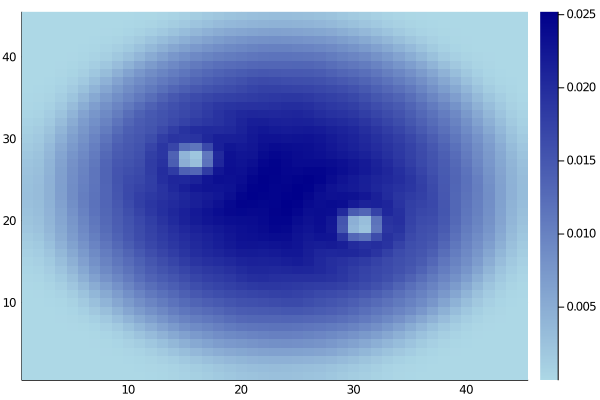

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut)
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)